# TODO:
- Create model and layers
- Review the differences in layers (mostly looking at the first numerical argument in the layer creation)
- Use a subset of the train/test data to create MVP

In [1]:
import sklearn as sk
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img
import matplotlib.pyplot as plt
import os
import datetime
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## Setup constants
IMAGE_SHAPE=(128, 128, 3)

DATA_DIR = '../data'
DATA_FABRICATED_DIR = os.path.join(DATA_DIR, 'fabricated')

#IMAGE_TEST_DIR = os.path.join(DATA_FABRICATED_DIR, 'hands_test')
IMAGE_TEST_DIR = os.path.join(DATA_FABRICATED_DIR, 'small_hands_test')
#IMAGE_VALIDATION_DIR = os.path.join(DATA_FABRICATED_DIR, 'hands_validation')
IMAGE_VALIDATION_DIR = os.path.join(DATA_FABRICATED_DIR, 'small_hands_validation')
#IMAGE_TRAIN_DIR = os.path.join(DATA_FABRICATED_DIR, 'hands_train')
IMAGE_TRAIN_DIR = os.path.join(DATA_FABRICATED_DIR, 'small_hands_train')

SAVED_MODEL_DIR = os.path.join(DATA_DIR, 'models')

In [3]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=[IMAGE_SHAPE[0], IMAGE_SHAPE[1], IMAGE_SHAPE[2]]))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  #optimizer='rmsprop',
                  metrics=['acc'])
    return model

create_model()

In [4]:
def create_data_generator():
    # All images will be rescaled by 1./255
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)
    validation_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            # This is the target directory
            IMAGE_TRAIN_DIR,
            target_size=[IMAGE_SHAPE[0], IMAGE_SHAPE[1]],
            batch_size=20,
            # Since we use binary_crossentropy loss, we need binary labels
            class_mode='binary')

    validation_generator = validation_datagen.flow_from_directory(
            IMAGE_VALIDATION_DIR,
            target_size=[IMAGE_SHAPE[0], IMAGE_SHAPE[1]],
            batch_size=20,
            class_mode='binary')
    
    return [train_generator, validation_generator]

create_data_generator()

Found 1131 images belonging to 2 classes.
Found 175 images belonging to 2 classes.


In [5]:
model = create_model()
train_generator, validation_generator = create_data_generator()

history = model.fit_generator(
      train_generator,
      epochs=80,
      validation_data=validation_generator
)

Found 1131 images belonging to 2 classes.
Found 175 images belonging to 2 classes.
Epoch 1/80
57/57 [==============================] - 33s 581ms/step - loss: 0.5174 - acc: 0.7421 - val_loss: 1.5015 - val_acc: 0.3314
Epoch 2/80
57/57 [==============================] - 31s 540ms/step - loss: 0.3631 - acc: 0.8537 - val_loss: 3.1697 - val_acc: 0.2514
Epoch 3/80
57/57 [==============================] - 31s 548ms/step - loss: 0.3494 - acc: 0.8558 - val_loss: 4.4303 - val_acc: 0.0800
Epoch 4/80
57/57 [==============================] - 31s 547ms/step - loss: 0.2890 - acc: 0.8798 - val_loss: 4.0929 - val_acc: 0.2171
Epoch 5/80
57/57 [==============================] - 31s 551ms/step - loss: 0.2428 - acc: 0.8896 - val_loss: 3.3516 - val_acc: 0.2857
Epoch 6/80
57/57 [==============================] - 32s 565ms/step - loss: 0.2264 - acc: 0.9058 - val_loss: 3.8486 - val_acc: 0.7086
Epoch 7/80
57/57 [==============================] - 31s 546ms/step - loss: 0.1765 - acc: 0.9440 - val_loss: 4.5325 - va

57/57 [==============================] - 31s 538ms/step - loss: 0.0362 - acc: 0.9895 - val_loss: 4.6925 - val_acc: 0.6743
Epoch 62/80
57/57 [==============================] - 31s 541ms/step - loss: 0.0315 - acc: 0.9903 - val_loss: 4.4378 - val_acc: 0.6971
Epoch 63/80
57/57 [==============================] - 31s 539ms/step - loss: 0.0114 - acc: 0.9965 - val_loss: 4.5543 - val_acc: 0.6971
Epoch 64/80
57/57 [==============================] - 31s 536ms/step - loss: 0.0252 - acc: 0.9886 - val_loss: 4.5207 - val_acc: 0.6971
Epoch 65/80
57/57 [==============================] - 31s 539ms/step - loss: 0.0216 - acc: 0.9921 - val_loss: 4.3798 - val_acc: 0.6971
Epoch 66/80
57/57 [==============================] - 31s 537ms/step - loss: 0.0193 - acc: 0.9903 - val_loss: 4.1886 - val_acc: 0.7143
Epoch 67/80
57/57 [==============================] - 31s 536ms/step - loss: 0.0390 - acc: 0.9868 - val_loss: 4.5404 - val_acc: 0.6800
Epoch 68/80
57/57 [==============================] - 31s 543ms/step - loss

In [6]:
train_generator, validation_generator = create_data_generator()
def show_images_for_generator(generator):
    cnt = 0
    batch = next(generator)
    print(batch[1])
    #print(batch[0][0])
    for img in batch[0]:
        cnt += 1
        plt.figure(cnt)

        imgplot = plt.imshow(array_to_img(img))
        if cnt == 5:
            break

Found 1131 images belonging to 2 classes.
Found 175 images belonging to 2 classes.


[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.]


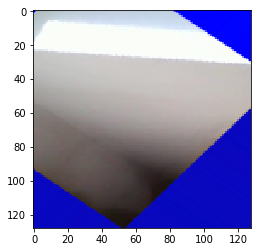

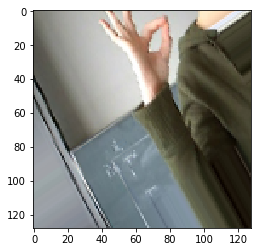

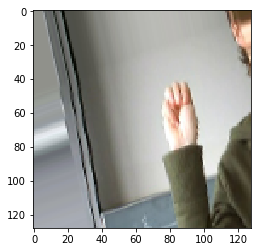

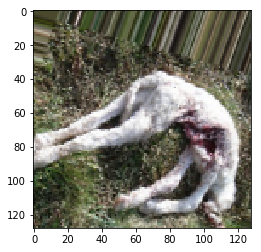

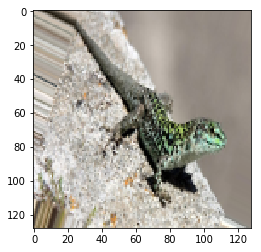

In [7]:
show_images_for_generator(train_generator)

In [8]:
# show_images_for_generator(validation_generator)

## Test Model

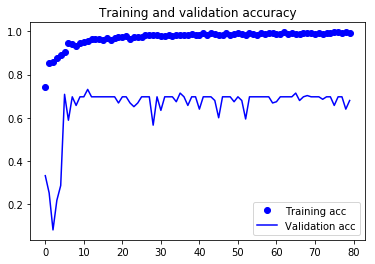

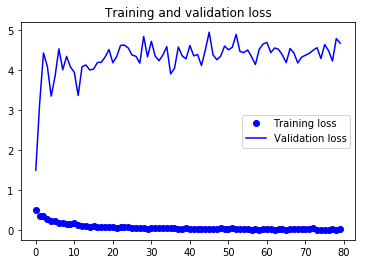

In [9]:
def desplay_trajectory(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
desplay_trajectory(history)

### Test model using unseen images

In [10]:

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        IMAGE_TEST_DIR,
        target_size=(IMAGE_SHAPE[0], IMAGE_SHAPE[1]),
        batch_size=82,
        class_mode='binary')

Found 118 images belonging to 2 classes.


In [11]:
batch = next(test_generator)
images = batch[0]
classes = batch[1]
predictions = model.predict(images)

In [12]:
image_map = {}
i = 0
for image in images:
    image_map[i] = image
    i += 1

In [13]:
test_image_results = pd.DataFrame({
    'images': list(image_map.keys()),
    'prediction': predictions.flatten(),
    'classes': classes
}) \
.sort_values('prediction', ascending=False)

test_image_results

classes  images    prediction
0       1.0       0  1.000000e+00
30      1.0      30  1.000000e+00
34      1.0      34  1.000000e+00
35      0.0      35  1.000000e+00
1       0.0       1  1.000000e+00
43      1.0      43  1.000000e+00
45      1.0      45  1.000000e+00
49      1.0      49  1.000000e+00
50      1.0      50  1.000000e+00
53      1.0      53  1.000000e+00
54      1.0      54  1.000000e+00
55      1.0      55  1.000000e+00
56      1.0      56  1.000000e+00
59      0.0      59  1.000000e+00
60      1.0      60  1.000000e+00
61      1.0      61  1.000000e+00
62      1.0      62  1.000000e+00
65      0.0      65  1.000000e+00
69      1.0      69  1.000000e+00
72      1.0      72  1.000000e+00
73      1.0      73  1.000000e+00
74      0.0      74  1.000000e+00
76      1.0      76  1.000000e+00
77      1.0      77  1.000000e+00
78      1.0      78  1.000000e+00
31      1.0      31  1.000000e+00
41      0.0      41  1.000000e+00
17      0.0      17  1.000000e+00
25      1.0      25  1.000000e+00
18      1.0      18  1.000000e+00
..      ...     ...           ...
81      0.0      81  4.362231e-01
6       0.0       6  2.001194e-01
63      0.0      63  1.727150e-01
19      0.0      19  3.896684e-03
80      0.0      80  3.468572e-03
40      0.0      40  1.210256e-03
8       0.0       8  6.774915e-04
5       0.0       5  2.787920e-04
57      0.0      57  2.497018e-04
22      0.0      22  2.241377e-04
13      0.0      13  1.496515e-04
29      0.0      29  9.679763e-05
39      0.0      39  7.204965e-05
4       0.0       4  7.139320e-05
70      0.0      70  6.413977e-05
2       0.0       2  5.708282e-05
46      0.0      46  4.131286e-05
44      0.0      44  3.193326e-05
51      0.0      51  2.927885e-05
66      0.0      66  2.788496e-05
71      0.0      71  1.549217e-05
36      0.0      36  1.238609e-05
16      0.0      16  1.234147e-05
67      0.0      67  1.026706e-05
3       0.0       3  6.957775e-06
48      0.0      48  6.323131e-06
47      0.0      47  3.889738e-06
20      0.0      20  2.871778e-06
68      0.0      68  2.035990e-06
64      0.0      64  5.874197e-07

[82 rows x 3 columns]

In [14]:

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [15]:
# fnames = [os.path.join(IMAGE_TEST_DIR, fname) for fname in test_image_results.filename]

#imgs = [load_img(fname, target_size=(100,100)) for fname in fnames]
imgs = [array_to_img(image_map[img]) for img in test_image_results.images]
show_images(imgs, 5, test_image_results.prediction)

## Save Model

In [16]:
def ensure_model_directory_exists():
    try:
        os.mkdir(SAVED_MODEL_DIR)
    except:
        print('Tried to create "{}" but it already exists'.format(SAVED_MODEL_DIR))

def save_model():
    ensure_model_directory_exists()
    
    evaluate_model_with_test_data = model.evaluate_generator(test_generator)

    accuracy_of_model = evaluate_model_with_test_data[-1]
    timestamp_raw = str(datetime.datetime.now())
    timestamp_without_milliseconds = timestamp_raw.split('.')[0]
    
    model_filename = '{}___{}.h5'.format(timestamp_without_milliseconds, accuracy_of_model)
    model_filepath = os.path.join(SAVED_MODEL_DIR, model_filename)
    
    print('saving file {}'.format(model_filepath))

    model.save(model_filepath)
save_model()

Tried to create "../data/models" but it already exists
saving file ../data/models/2018-10-08 22:58:19___0.9911582649123025.h5
